# Z-test

In [36]:
import pandas as pd

In [37]:
df=pd.read_csv(r"C:\\Users\\sunta\\OneDrive\\Desktop\\data\\statisticalsignificance\\StudentsPerformance.csv")

In [38]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:
# we need to group of these scores as total score, we can take a sum
df['total'] = df['math score'] + df['reading score'] + df['writing score']

In [40]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total'],
      dtype='object')

In [41]:
df = df.drop(columns=['math score', 'reading score',
       'writing score'])

In [42]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [43]:
df.rename(columns={'race/ethnicity': 'group'}, inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   group                        1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   total                        1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [45]:
df.groupby('group').mean(['total'])

,total
group,
group A,188.977528
group B,196.405263
group C,201.394984
group D,207.538168
group E,218.257143


In [48]:
from statsmodels.formula.api import ols

res = ols('total ~ group', data=df).fit()

In [52]:
import statsmodels.api as sm

sm.stats.anova_lm(res)

,df,sum_sq,mean_sq,F,PR(>F)
group,4.0,6.447281e+04,16118.203264,9.096052,3.225869e-07
Residual,995.0,1.763140e+06,1771.999842,NaN,NaN


In [46]:
https://www.kaggle.com/code/mohammadhy/statistic-z-test-anova-eda-ml-cluster/notebook

SyntaxError: invalid syntax (3100233725.py, line 1)

In [53]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Run Tukey test
tukey = pairwise_tukeyhsd(endog=df['total'], groups=df['group'], alpha=0.05)
print(tukey)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
group A group B   7.4277 0.6447 -7.3486 22.2041  False
group A group C  12.4175 0.1006  -1.373 26.2079  False
group A group D  18.5606 0.0031  4.4468 32.6745   True
group A group E  29.2796    0.0 13.6842  44.875   True
group B group C   4.9897 0.6953 -5.5523 15.5317  False
group B group D  11.1329 0.0445  0.1712 22.0946   True
group B group E  21.8519    0.0  9.0388  34.665   True
group C group D   6.1432 0.4036 -3.4482 15.7345  False
group C group E  16.8622 0.0008  5.1999 28.5245   True
group D group E   10.719 0.1076 -1.3241  22.762  False
------------------------------------------------------


c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


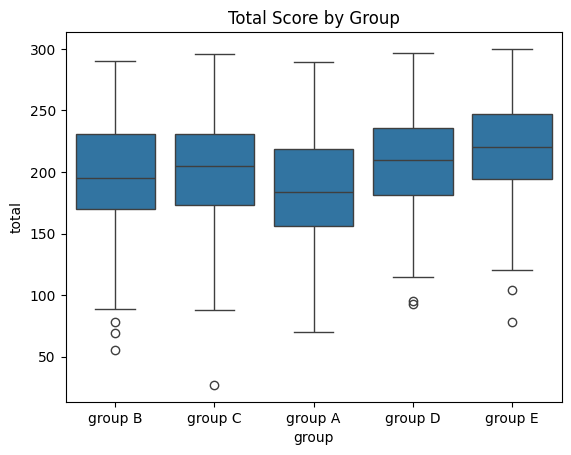

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='group', y='total', data=df)
plt.title("Total Score by Group")
plt.show()
